In [37]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from langdetect import detect

In [60]:
consumerKey = '54L0AA3inJrvT4L1qmvy4CEyT'
consumerSecret = 'kABZno3SU9wDAriKdknS5OcFGltxsXZCu8kroWMl82oPrQy5nR'
accessToken = '1356138040599728130-6pM65qNucSyeUqCIGQh6JtfoXeEpp2'
accessTokenSecret = 'gp6USJgl6fVpPB73b2inggwYmKuGXbbbbrC23H3PVydLu'

In [61]:
#Create authenticate object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

#create API object
api = tweepy.API(authenticate)

In [62]:
query = 'covishield'
max_tweets = 1000
results_covishield = api.search_tweets(q=query, count=max_tweets)
query = 'covaxin'
results_covaxin = api.search_tweets(q=query, count=max_tweets)
query = 'sputnik'
results_sputnik = api.search_tweets(q=query, count=max_tweets)

In [63]:
json_data = [r._json for r in results_covishield]
df_covishield = pd.json_normalize(json_data)

json_data = [r._json for r in results_covaxin]
df_covaxin = pd.json_normalize(json_data)

json_data = [r._json for r in results_sputnik]
df_sputnik = pd.json_normalize(json_data)

In [64]:
df_covishield.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang
0,Mon Sep 27 18:08:05 +0000 2021,1442551632231866371,1442551632231866371,@ProfMKay What is govt &amp; @BharatBiotech do...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.440361e+18,1440361344461533186,4.375070e+09,4375069574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Sep 27 18:07:28 +0000 2021,1442551477185105920,1442551477185105920,@TOIIndiaNews What is govt &amp; @BharatBiotec...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.441200e+18,1441199526207844356,2.995893e+07,29958928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Sep 27 18:06:40 +0000 2021,1442551275401322497,1442551275401322497,@ajaychhabria @PMOIndia @timesofindia @TimesNo...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.440908e+18,1440908368005132294,1.100908e+08,110090838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mon Sep 27 18:06:21 +0000 2021,1442551196451966981,1442551196451966981,"Covishield, Covaxin, Sputnik V, J&amp;J, Moder...",False,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Sep 27 18:06:09 +0000 2021,1442551149324767237,1442551149324767237,@Infoosvswaorg1 @BharatBiotech @SuchitraElla @...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.442079e+18,1442078936528130055,9.995113e+17,999511327373643776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_covaxin.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.lang
0,Mon Sep 27 18:08:39 +0000 2021,1442551776289325056,1442551776289325056,RT @MahuaMoitra: “WHO's Covaxin Clearance Dela...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Sep 27 18:08:33 +0000 2021,1442551750041423875,1442551750041423875,@GovCanHealth covaxin is the best,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.442550e+18,1442549737538965512,3.637582e+07,36375825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Sep 27 18:08:05 +0000 2021,1442551632231866371,1442551632231866371,@ProfMKay What is govt &amp; @BharatBiotech do...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.440361e+18,1440361344461533186,4.375070e+09,4375069574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mon Sep 27 18:07:55 +0000 2021,1442551593648467969,1442551593648467969,RT @MahuaMoitra: “WHO's Covaxin Clearance Dela...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Sep 27 18:07:29 +0000 2021,1442551483086508032,1442551483086508032,@Hopperz1980 @MahuaMoitra Totally agree mark.\...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.442550e+18,1442550368106385411,3.042762e+08,304276230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_sputnik.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Mon Sep 27 18:08:48 +0000 2021,1442551813450895363,1442551813450895363,RT @Harun44445792: @drtkone @sputnik_TR Sende ...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Sep 27 18:08:46 +0000 2021,1442551806005952514,1442551806005952514,RT @Mippcivzla: 📢𝐏𝐑𝐄𝐒𝐓𝐀 𝐀𝐓𝐄𝐍𝐂𝐈𝐎́𝐍❗️\nPlan de V...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Sep 27 18:08:45 +0000 2021,1442551802264698884,1442551802264698884,RT @MarianCarra: Estás despedida!!! Tenés sput...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mon Sep 27 18:08:44 +0000 2021,1442551795947954179,1442551795947954179,"RT @osvaldobazan: “Sputnik hay en 70 países, m...",False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Sep 27 18:08:41 +0000 2021,1442551783335804929,1442551783335804929,@andkenbr @mllichti @zeynep Speaking of covid ...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.442535e+18,1442535341148172288,250926221.0,250926221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#Extracting only the tweet column from the dfs

df_covishield = df_covishield['text']
df_covishield = df_covishield.to_frame().reset_index()
del df_covishield['index']

df_covaxin = df_covaxin['text']
df_covaxin = df_covaxin.to_frame().reset_index()
del df_covaxin['index']

df_sputnik = df_sputnik['text']
df_sputnik = df_sputnik.to_frame().reset_index()
del df_sputnik['index']

In [68]:
#Cleaning the tweets

def cleanTweets(text):
    
    if text == '' or text=='...' or text== None:
        return 'None'
    try:
        lang = detect(text)
        if lang !='en':
            return 'None'
    except Exception as e:
        print(e)
        print(text)
        return 'None'
    
    # Convert to lowercase
    text = text.lower()
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweets:
    text = re.sub(r'RT : ', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    # Removing extra spaces from start and end
    text = re.sub(r"^\s+", "", text)
    
    return text
  
df_covishield['text'] = df_covishield['text'].apply(cleanTweets)
df_covaxin['text'] = df_covaxin['text'].apply(cleanTweets)
df_sputnik['text'] = df_sputnik['text'].apply(cleanTweets)

No features in text.
https://t.co/p8eb2O5mnk


In [69]:
df_covaxin = df_covaxin[df_covaxin.text != 'None']
df_covishield = df_covishield[df_covishield.text != 'None']
df_sputnik = df_sputnik[df_sputnik.text != 'None']
df_covaxin.dropna()
df_covishield.dropna()
df_sputnik.dropna()

,text
4,speaking of covid did you see this article?\n
12,new u.s. travel rules close door on those full...
14,production issues worry me... today my mom in ...
44,rt : sputnik v is not the only vaccine facing ...
47,"covishield, covaxin, sputnik v, j&amp;j, moder..."
81,rt : yeonbunny and his pink plushie 🐰


In [70]:

#Create a function for subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creating seperate columns for subjectivity and polarity

df_covishield['Subjectivity'] = df_covishield['text'].apply(getSubjectivity)
df_covishield['Polarity'] = df_covishield['text'].apply(getPolarity)

df_covaxin['Subjectivity'] = df_covaxin['text'].apply(getSubjectivity)
df_covaxin['Polarity'] = df_covaxin['text'].apply(getPolarity)

df_sputnik['Subjectivity'] = df_sputnik['text'].apply(getSubjectivity)
df_sputnik['Polarity'] = df_sputnik['text'].apply(getPolarity)

In [71]:
#builds a function to calculate and categorize each tweet as Negative, Neutral, and Positive
def getTextAnalysis(text):
    if text < 0:
        return "Negative"
    elif text == 0:
        return "Neutral"
    else:
        return "Positive"
    
    
#creates another column called Score and applies the function to the dataframe
df_covishield['Score'] = df_covishield['Polarity'].apply(getTextAnalysis)
df_covaxin['Score'] = df_covaxin['Polarity'].apply(getTextAnalysis)
df_sputnik['Score'] = df_sputnik['Polarity'].apply(getTextAnalysis)


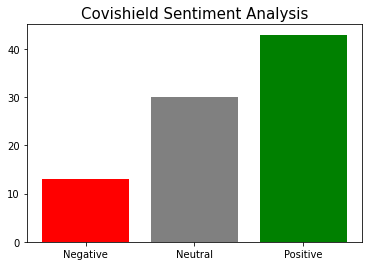

In [72]:
#visualizes the data through a bar chart

x_axis = df_covishield.groupby('Score').count().index.values
y_axis = df_covishield.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Covishield Sentiment Analysis", fontsize = '15')
plt.show()

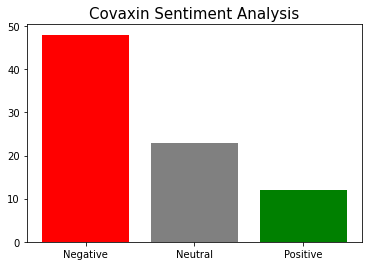

In [73]:
#visualizes the data through a bar chart

x_axis = df_covaxin.groupby('Score').count().index.values
y_axis = df_covaxin.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Covaxin Sentiment Analysis", fontsize = '15')
plt.show()

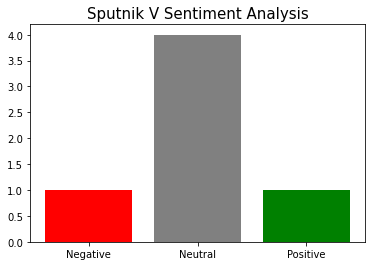

In [74]:
#visualizes the data through a bar chart

x_axis = df_sputnik.groupby('Score').count().index.values
y_axis = df_sputnik.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Sputnik V Sentiment Analysis", fontsize = '15')
plt.show()

# Conclusion



Althogh working on a small data set of 1000 tweets , we can easily come to the following conclusions:
1. Covishield vaccine faces the least criticism from the people. Having most amount of positive tweets , moderate neutral tweets and very less negative tweets. This shows that Covishield has been more trusted by people.
2. In the case of Covaxin, it has mostly negative tweets related to itself. The number of positive and neutral tweets are fairly low , from which we can come to a conclusion that it is not preferred amongst people.
3. Sputnik just like Covishield has more number of positive tweets than neutral. With a moderate number of tweets in neutral and negative fields , we can say that it is fairly approved by people.